# Person Detection using Pre-Trained YOLOv8 model (Custom Dataset)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BiKH1d1uXKPz0gLnBnOR")
project = rf.workspace("titulacin").project("person-detection-9a6mk")
version = project.version(16)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Person-detection-16 in yolov8:: 100%|██████████| 10978/10978 [00:04<00:00, 2498.34it/s]


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 13.4 MB/s eta 0:00:00


In [ ]:
!nvidia-smi

Sat Nov  2 18:36:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from ultralytics import YOLO
import torch

# 1. Load a pre-trained YOLOv8 model
model = YOLO('yolov8l.pt')

# 2. Load your custom dataset
data_path = '/content/Person-detection-16/data.yaml'  # Path to your custom dataset YAML file

# 3. Fine-tune the model on the custom dataset
model.train(data=data_path, epochs=50, batch=16, imgsz=640, workers=4)

# 4. Evaluate the model on test data
metrics = model.val()

# 5. Save the fine-tuned model
model.save('yolov8_custom_person_gender.pt')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 83.7M/83.7M [00:00<00:00, 156MB/s]


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/Person-detection-16/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 10.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 52.6MB/s]


AMP: checks passed ✅


train: Scanning /content/Person-detection-16/train/labels... 4407 images, 69 backgrounds, 0 corrupt: 100%|██████████| 4407/4407 [00:02<00:00, 1929.69it/s]


train: New cache created: /content/Person-detection-16/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Person-detection-16/valid/labels... 1071 images, 44 backgrounds, 0 corrupt: 100%|██████████| 1071/1071 [00:01<00:00, 844.92it/s]

val: New cache created: /content/Person-detection-16/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.3G      1.741      2.135      1.833         11        640: 100%|██████████| 276/276 [03:48<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:23<00:00,  1.44it/s]


                   all       1071       2293      0.092      0.218     0.0615     0.0212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.3G      1.975      2.414      2.035         28        640: 100%|██████████| 276/276 [03:46<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.48it/s]


                   all       1071       2293      0.224      0.209      0.145     0.0551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.3G      1.914      2.335      1.978         12        640: 100%|██████████| 276/276 [03:45<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.50it/s]


                   all       1071       2293      0.322      0.367      0.284       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.5G      1.817      2.184      1.896         23        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293      0.467      0.453       0.42       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.6G      1.724      2.058      1.814         41        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.52it/s]

                   all       1071       2293      0.503      0.474      0.442      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.5G      1.677      1.947      1.763         22        640: 100%|██████████| 276/276 [03:43<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293      0.648      0.528      0.568      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.5G      1.628      1.862      1.717         25        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293      0.636      0.532      0.582      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.5G      1.584      1.782       1.68         26        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.52it/s]

                   all       1071       2293      0.549      0.521      0.514       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.5G      1.547      1.731      1.662         47        640: 100%|██████████| 276/276 [03:43<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293      0.652      0.587      0.626      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.5G      1.504      1.653       1.62         29        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.53it/s]

                   all       1071       2293      0.634      0.536      0.567      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.5G      1.489      1.625      1.605         21        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.52it/s]

                   all       1071       2293      0.719      0.588      0.666      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.4G      1.464      1.582      1.592         39        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.50it/s]

                   all       1071       2293      0.735      0.614      0.689      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.5G      1.435      1.535      1.568         36        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.52it/s]

                   all       1071       2293      0.689       0.64      0.684      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.4G      1.411      1.492      1.545         25        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.53it/s]

                   all       1071       2293      0.715      0.626      0.692      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.4G      1.397       1.45      1.535         83        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293      0.734       0.65      0.709      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.5G      1.383      1.433      1.524         21        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.50it/s]

                   all       1071       2293      0.764      0.657      0.728      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.5G      1.351      1.371      1.509         28        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.53it/s]

                   all       1071       2293      0.748      0.624      0.717      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.4G      1.336      1.374      1.497         15        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293      0.759      0.628      0.725      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.4G      1.318      1.344      1.479         26        640: 100%|██████████| 276/276 [03:43<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.52it/s]

                   all       1071       2293      0.759      0.637      0.726      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.3G      1.319      1.297      1.474         16        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.50it/s]

                   all       1071       2293      0.779      0.655       0.75      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.4G      1.278      1.265      1.458         31        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.53it/s]

                   all       1071       2293      0.783      0.659      0.748      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.4G      1.271      1.239      1.453         27        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.53it/s]

                   all       1071       2293      0.764      0.682      0.757      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.4G      1.251      1.216       1.44         39        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293      0.802      0.646      0.756      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.3G      1.238       1.19      1.418         25        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.52it/s]

                   all       1071       2293      0.783      0.691      0.771       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.4G      1.216      1.175      1.411         16        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293      0.752      0.683      0.749      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.4G      1.221      1.154      1.416         37        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293      0.782      0.674      0.759      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.4G       1.21      1.145      1.404         19        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293       0.77      0.663      0.759      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.4G       1.18      1.097      1.386         36        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293      0.779       0.69      0.776      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.5G      1.161      1.078      1.375         32        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.52it/s]

                   all       1071       2293      0.801      0.676      0.771      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.4G      1.151      1.077      1.365         17        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.50it/s]

                   all       1071       2293      0.802      0.691      0.782      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.5G      1.131      1.052      1.355         33        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293      0.818      0.697      0.789      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.4G      1.129       1.05      1.358         24        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.53it/s]

                   all       1071       2293       0.82      0.686      0.785      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.4G      1.109      1.003      1.338         20        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.53it/s]

                   all       1071       2293      0.816      0.707      0.793      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.4G      1.101     0.9941      1.337         15        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.53it/s]

                   all       1071       2293        0.8      0.723      0.793      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.3G      1.095     0.9807      1.328         34        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.52it/s]

                   all       1071       2293      0.829      0.701      0.796      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.5G      1.075     0.9579      1.316         32        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.52it/s]

                   all       1071       2293      0.832      0.703      0.804      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.4G      1.067      0.959      1.304         31        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.52it/s]

                   all       1071       2293      0.837      0.692      0.798       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.4G       1.04     0.9239      1.302         15        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.53it/s]

                   all       1071       2293      0.823      0.716      0.808      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.4G      1.026     0.8978      1.287         60        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.54it/s]

                   all       1071       2293      0.826       0.71      0.805      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.4G      1.028     0.8927      1.287         30        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.53it/s]

                   all       1071       2293      0.809      0.728      0.809      0.523


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.4G     0.9621     0.7465      1.228         17        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.52it/s]

                   all       1071       2293       0.81      0.721      0.801      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.4G     0.9455     0.7213      1.221          7        640: 100%|██████████| 276/276 [03:43<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293      0.847      0.715      0.809      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.4G     0.9264     0.6974      1.204         19        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.53it/s]

                   all       1071       2293      0.816      0.746      0.815      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.3G     0.9008     0.6754      1.186         16        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293      0.823      0.738      0.814      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.4G     0.8903     0.6575      1.185         28        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.54it/s]

                   all       1071       2293      0.808      0.744      0.807      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.3G     0.8644     0.6331      1.164          8        640: 100%|██████████| 276/276 [03:43<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.51it/s]

                   all       1071       2293      0.833      0.724      0.808      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.5G     0.8502      0.621      1.153         18        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.53it/s]

                   all       1071       2293      0.845      0.724      0.816      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.3G     0.8409     0.6043      1.148         12        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.53it/s]

                   all       1071       2293      0.833      0.739      0.815       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.5G     0.8287     0.5862       1.14         23        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.52it/s]

                   all       1071       2293      0.835      0.742      0.819      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.4G      0.809      0.573      1.132         11        640: 100%|██████████| 276/276 [03:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.52it/s]

                   all       1071       2293      0.836      0.739       0.82      0.544



50 epochs completed in 3.595 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:23<00:00,  1.45it/s]


                   all       1071       2293      0.836      0.739       0.82      0.543
Speed: 0.2ms preprocess, 16.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /content/Person-detection-16/valid/labels.cache... 1071 images, 44 backgrounds, 0 corrupt: 100%|██████████| 1071/1071 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:46<00:00,  1.43it/s]


                   all       1071       2293      0.836      0.741       0.82      0.544
Speed: 0.3ms preprocess, 38.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


# Gender Classification using Transfer Learning

In [ ]:
# Upload the kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"utkarshpushpankar","key":"aab122819b82b3dd53508875713c2d92"}'}

In [ ]:
# Install Kaggle and set up the Kaggle environment
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Secure the API key

# Download the dataset (replace 'dataset-name' with your dataset identifier)
!kaggle datasets download -d hossamrizk/cctv-gender-classifier-dataset

Dataset URL: https://www.kaggle.com/datasets/hossamrizk/cctv-gender-classifier-dataset
License(s): CC-BY-NC-SA-4.0
 99% 222M/225M [00:10<00:00, 23.7MB/s]
100% 225M/225M [00:10<00:00, 21.6MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cctv-gender-classifier-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!pip install tensorflow
!pip install keras

import os
import random
import shutil
import glob as gb
from tqdm import tqdm
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, AveragePooling2D,Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model

from keras import Model
from keras.layers import Input

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
def visualize_random_images(male_folder, female_folder, num_images=5):
    male_images = os.listdir(male_folder)
    female_images = os.listdir(female_folder)

    fig, axes = plt.subplots(2, num_images, figsize=(15, 7))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for i in range(num_images):
        male_image_path = os.path.join(male_folder, random.choice(male_images))
        female_image_path = os.path.join(female_folder, random.choice(female_images))

        male_img = plt.imread(male_image_path)
        female_img = plt.imread(female_image_path)

        axes[0, i].imshow(male_img)
        axes[0, i].axis('off')
        axes[0, i].set_title('Male')

        axes[1, i].imshow(female_img)
        axes[1, i].axis('off')
        axes[1, i].set_title('Female')

    plt.show()

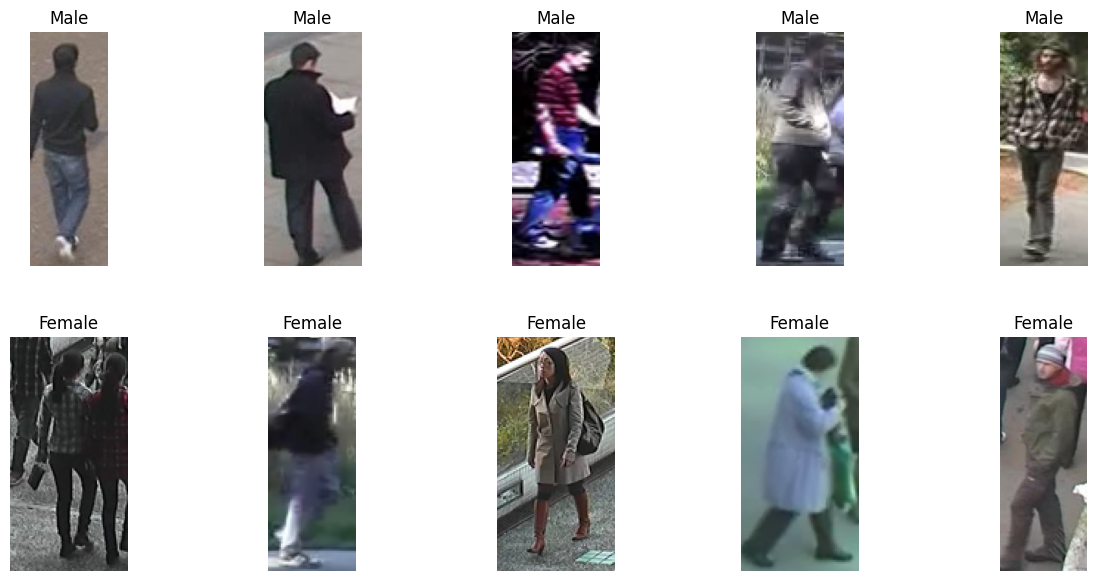

In [ ]:
def reduce_dataset_size(source_folder, target_folder, fraction=0.4):
    # Create target folder if it doesn't exist
    os.makedirs(target_folder, exist_ok=True)

    # Get all image file names
    all_images = os.listdir(source_folder)
    # Calculate number of images to keep
    num_images_to_keep = int(len(all_images) * fraction)

    # Randomly sample images
    selected_images = random.sample(all_images, num_images_to_keep)

    # Copy selected images to target folder
    for image in selected_images:
        shutil.copy(os.path.join(source_folder, image), os.path.join(target_folder, image))

# Paths to original and reduced dataset folders
male_folder = '/content/CCTV Gender Classifier Dataset/MALE'
female_folder = '/content/CCTV Gender Classifier Dataset/FEMALE'
reduced_male_folder = '/content/Reduced Dataset/MALE'
reduced_female_folder = '/content/Reduced Dataset/FEMALE'

# Reduce dataset size by 50% for each category
reduce_dataset_size(male_folder, reduced_male_folder, fraction=0.4)
reduce_dataset_size(female_folder, reduced_female_folder, fraction=0.4)

# Proceed with visualization or training using reduced folders
visualize_random_images(reduced_male_folder, reduced_female_folder)

In [ ]:
num_male_images = len(os.listdir(reduced_male_folder))
num_female_images = len(os.listdir(reduced_female_folder))

print(f"Total number of male images: {num_male_images}")
print(f"Total number of female images: {num_female_images}")

Total number of male images: 3778
Total number of female images: 3870


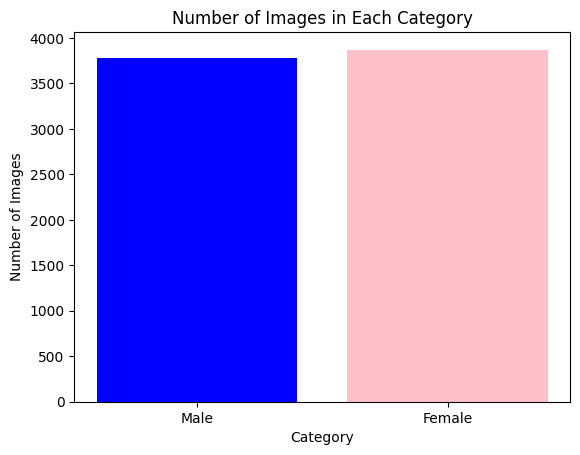

In [ ]:
# Create bar plot
categories = ['Male', 'Female']
num_images = [num_male_images, num_female_images]

plt.bar(categories, num_images, color=['blue', 'pink'])
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')
plt.show()

In [ ]:
DataPath = '/content/Reduced Dataset'

labels2int={"MALE":0,"FEMALE":1}
int2labels={0:"MALE",1:"FEMALE"}

Data = []
Classes = []

# Iterate through each folder in DataPath
for folder in os.listdir(DataPath):
    print(folder)

    # Construct the full path to the folder
    folder_path = os.path.join(DataPath, folder)

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    print(f"Data found {len(files)} in {folder}")

    # Iterate through each file in the folder
    for file in files:
        # Construct the full path to the file
        file_path = os.path.join(folder_path, file)

        # Load the image, resize it, and convert it to an array
        img = load_img(file_path, target_size=(200, 100))
        img_array = img_to_array(img)

        # Preprocess the image array
        img_array = preprocess_input(img_array)

        # Append the preprocessed image array to the Data list
        Data.append(img_array)

        # Append the label to the Classes list based on the folder name
        Classes.append(labels2int[folder])

FEMALE
Data found 3870 in FEMALE
MALE
Data found 3778 in MALE


In [ ]:
print("Length of Classes before binarization:", len(Classes))

Length of Classes before binarization: 7648


In [ ]:
lb = LabelBinarizer()
Classes = lb.fit_transform(Classes)
Classes = to_categorical(Classes)

In [ ]:
print("Shape of Classes after binarization and conversion:", Classes.shape)

Shape of Classes after binarization and conversion: (7648, 2)


In [ ]:
Data = np.array(Data,dtype = "float32")
Classes = np.array(Classes)
trainx,testx,trainy,testy = train_test_split(Data,Classes,test_size=0.20,
                                             random_state=42)
print("Shape of training data (trainx):", trainx.shape)
print("Shape of testing data (testx):", testx.shape)
print("Shape of training labels (trainy):", trainy.shape)
print("Shape of testing labels (testy):", testy.shape)

Shape of training data (trainx): (6118, 200, 100, 3)
Shape of testing data (testx): (1530, 200, 100, 3)
Shape of training labels (trainy): (6118, 2)
Shape of testing labels (testy): (1530, 2)


In [ ]:
Data = np.array(Data,dtype = "float32")
Classes = np.array(Classes)
# Split data into training and testing sets (80% train, 20% test)
Data_train, Data_test, Classes_train, Classes_test = train_test_split(Data, Classes, test_size=0.2, random_state=42)

# Split training data into training and validation sets (80% train, 20% validation)
Data_train, Data_val, Classes_train, Classes_val = train_test_split(Data_train, Classes_train, test_size=0.2, random_state=42)

print("Shape of training data (Data_train):", Data_train.shape)
print("Shape of Validation data (Data_val):", Data_val.shape)
print("Shape of testing data (Data_test):", Data_test.shape)
print('=============================================================')
print("Shape of training labels (Classes_train):", Classes_train.shape)
print("Shape of Validation labels (Classes_test):", Classes_val.shape)
print("Shape of testing labels (Classes_test):", Classes_test.shape)

Shape of training data (Data_train): (4894, 200, 100, 3)
Shape of Validation data (Data_val): (1224, 200, 100, 3)
Shape of testing data (Data_test): (1530, 200, 100, 3)
Shape of training labels (Classes_train): (4894, 2)
Shape of Validation labels (Classes_test): (1224, 2)
Shape of testing labels (Classes_test): (1530, 2)


In [ ]:
def resnet50_modelarch():
    lr = 1e-5
    epochs = 10

    basemodel= ResNet50(include_top=False, input_shape=(200,100,3))
    headmodel= basemodel.output
    headmodel= AveragePooling2D(pool_size=(3,3))(headmodel)

    #headmodel = Dense(1024, activation="relu")(headmodel)
    #headmodel = Dropout(0.3)(headmodel)
    headmodel = Flatten(name="flatten")(headmodel)
    headmodel = Dense(512, activation="relu")(headmodel)
    headmodel = Dropout(0.3)(headmodel)
    headmodel = Dense(256, activation="relu")(headmodel)
    headmodel = Dropout(0.3)(headmodel)
    headmodel = Dense(128, activation="relu")(headmodel)
    headmodel = Dropout(0.3)(headmodel)
    headmodel = Dense(64, activation="relu")(headmodel)
    #headmodel = Dropout(0.3)(headmodel)
    headmodel = Dense(2, activation='softmax')(headmodel)

    model=Model(inputs=basemodel.input, outputs=headmodel)

    for layer in basemodel.layers:
        layer.trainable=False

    opt=Adam(learning_rate=lr, decay=lr / epochs)
    model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
    callback = EarlyStopping(monitor='val_loss',patience=6)

    return model,callback,epochs

In [ ]:
model,callback,Epochs = resnet50_modelarch()
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200, 100, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 206, 106, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 100, 50, 64)    │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 100, 50, 64)    │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 100, 50, 64)    │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 102, 52, 64)    │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 50, 25, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 50, 25, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 50, 25, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 50, 25, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 50, 25, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 50, 25, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 50, 25, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 50, 25, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 50, 25, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,857,986 (98.64 MB)

 Trainable params: 2,270,274 (8.66 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history = model.fit(Data_train,Classes_train,
                    batch_size=32,
                    validation_data=(Data_val,Classes_val),
                    epochs=50,callbacks=[callback])

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 43s 170ms/step - accuracy: 0.5196 - loss: 0.8031 - val_accuracy: 0.6299 - val_loss: 0.6624
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.5706 - loss: 0.7251 - val_accuracy: 0.6658 - val_loss: 0.6406
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.6003 - loss: 0.6916 - val_accuracy: 0.6879 - val_loss: 0.6239
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.6364 - loss: 0.6514 - val_accuracy: 0.6953 - val_loss: 0.6044
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.6518 - loss: 0.6370 - val_accuracy: 0.7067 - val_loss: 0.5879
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.6638 - loss: 0.6245 - val_accuracy: 0.7149 - val_loss: 0.5683
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.7099 - loss: 0.5892 - val_accuracy: 0.7190 - val_loss: 0.5515
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.7029 - loss: 0.5779 - val

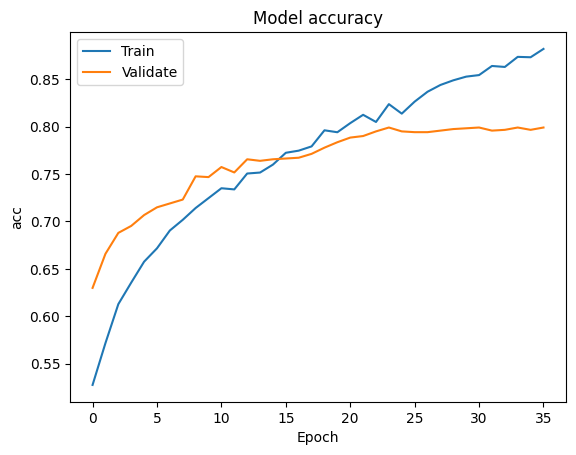

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

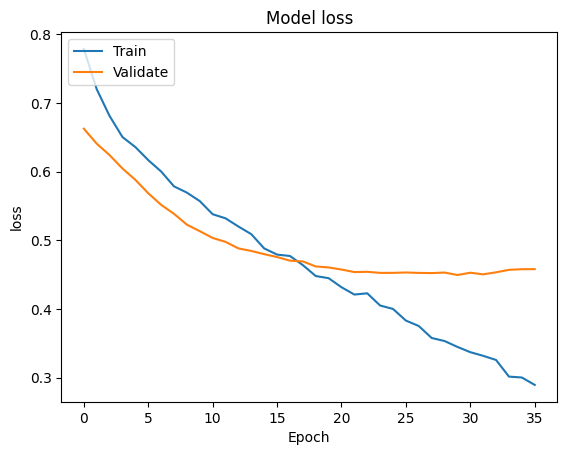

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(Data_test,Classes_test, verbose=1)
print("ResNet50 Score:",scores[1])

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.7897 - loss: 0.4777
ResNet50 Score: 0.7928104400634766


In [ ]:
predIdxs = model.predict(Data_test,batch_size=32)
predIdxs=np.argmax(predIdxs,axis=1)

48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
testy_res = Classes_test.argmax(axis=1)
CR = classification_report(testy_res, predIdxs)
print(CR)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       739
           1       0.82      0.77      0.79       791

    accuracy                           0.79      1530
   macro avg       0.79      0.79      0.79      1530
weighted avg       0.79      0.79      0.79      1530



In [ ]:
# Get predictions for the test set
predictions = model.predict(Data_test)

# Convert predictions to class labels (0 for male, 1 for female)
predicted_labels = np.argmax(predictions, axis=1)

# Compare predicted labels with true labels
correct_predictions = np.sum(predicted_labels == np.argmax(Classes_test, axis=1))
total_samples = len(Classes_test)

# Calculate accuracy
accuracy = correct_predictions / total_samples
print("Test Accuracy:", accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
Test Accuracy: 0.7928104575163398


In [ ]:
class_names=['MALE','FEMALE']

In [ ]:
import random
def plot_prediction(Data_test, Classes_test, n_images, class_names):
    """
    Test the model on random predictions and plot the results.

    Args:
        Data_test (numpy array): The test images data.
        Classes_test (numpy array): The true labels for the test images.
        n_images (int): Number of images to plot.
        class_names (list): List of class names.
    """
    # Get the total number of test images
    num_images = len(Data_test)

    # Randomly select indices for the images to plot
    random_indices = random.sample(range(num_images), n_images)

    # Make predictions on the selected test data
    predictions = np.argmax(model.predict(Data_test[random_indices]), axis=1)

    # Plot the randomly selected images along with their true labels and predictions
    plt.figure(figsize=(14, 15))
    for i, idx in enumerate(random_indices):
        plt.subplot(4, 3, i+1)
        plt.imshow(Data_test[idx])
        if predictions[i] == np.argmax(Classes_test[idx]):
            title_color = 'g'  # green color for correct predictions
        else:
            title_color = 'r'  # red color for incorrect predictions
        plt.title(class_names[np.argmax(Classes_test[idx])], color=title_color)
        plt.axis('off')

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


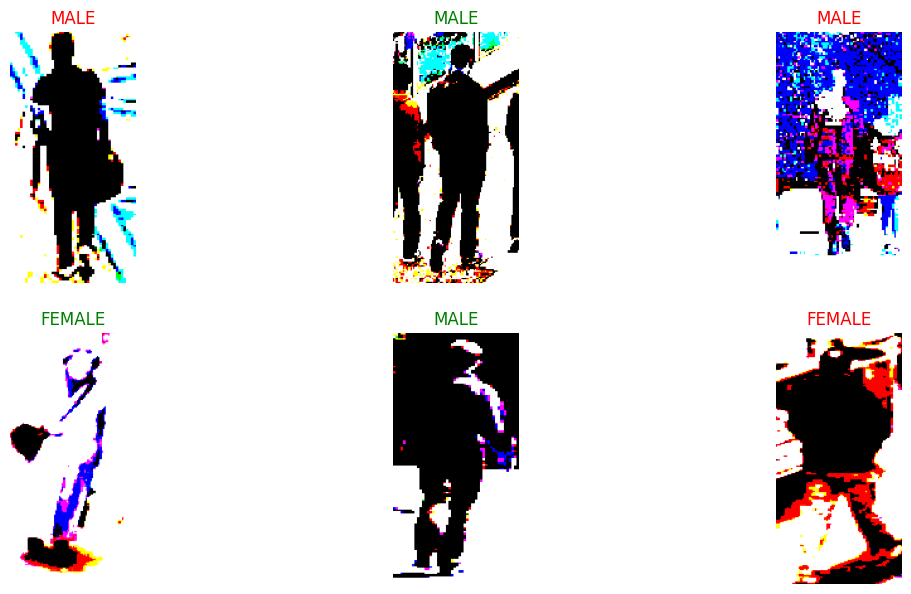

In [ ]:
plot_prediction(Data_test, Classes_test, n_images=6, class_names=class_names)

In [ ]:
model.save("GenderClassification.h5")